In [1]:
LegendreTransform[f_] := Module[{x, y, sol, expr},
    sol = Solve[f'[x] == y, x, Reals]; (*writes x in terms of y = f'[x]*)
    expr = FullSimplify[ First[y x - f[x] /. sol], Element[{x, y}, Reals] ];
            (*Calculates the Legendre transform, a function of y = f'[x] *)
  Evaluate[ expr /. y -> #] & (*Evaluates y as a variable and makes the result a funcion*)]

In [46]:
f[x_] := 2 (x-1)^2 + 3
int = {-5, 5}

{-5, 5}

In [48]:
u[x_] := f'[x]
h[x_, x0_] := u[x0]*(x - x0) + f[x0]
g[y_] := LegendreTransform[f [#] &][y]

In [51]:
x0 = 2;

figs = Table[
Row[{
Show[{
    Plot[f[x], {x, int[[1]], int[[-1]]}, PlotTheme -> "Scientific",  FrameLabel -> {"x", "f[x]"}, ImageSize -> Medium],
    Plot[h[x, x0], {x, Min[{-5, int[[1]]}], int[[-1]]},  PlotStyle -> Dashed]
    },
    PlotRange -> {MinMax[Append[int, 0]],
                    MinMax[Append[Map[h[0, #] &, Range @@ int], Map[f[#] &, Range @@ int]]]},
    Epilog -> {PointSize[Large], Red, 
                    Point[{0, h[0, x0]}],  
                    Inset[h[0, x0], {.5, h[0, x0]}],
                Blue, 
                    Point[{x0, f[x0]}], 
                    Inset["f'[x0] = " <> ToString@u[x0], {x0, f[x0] - 5}]
              }
    ],
Plot[g[y], {y, u@int[[1]], u@int[[-1]]}, PlotTheme -> "Scientific", 
            FrameLabel -> {"u = f'[x]", "L[f[x]] = g[u]"}, 
            ImageSize -> Medium,
         Epilog -> {PointSize[Large], Red, Point[{u[x0], g[u[x0]]}], 
                   Inset["(" <> ToString[u[x0]] <> "," <> ToString@g[u[x0]] <> ")", {u[x0], g[u[x0]] - 1}]
                   }]
    }],
{x0, int[[1]], int[[-1]],.1}];

In [66]:
Export["Legendre-quadratic.gif",figs, "DisplayDurations" -> .15, "AnimationRepetitions" -> \[Infinity]]

Legendre-quadratic.gif

-Graphics--Graphics-
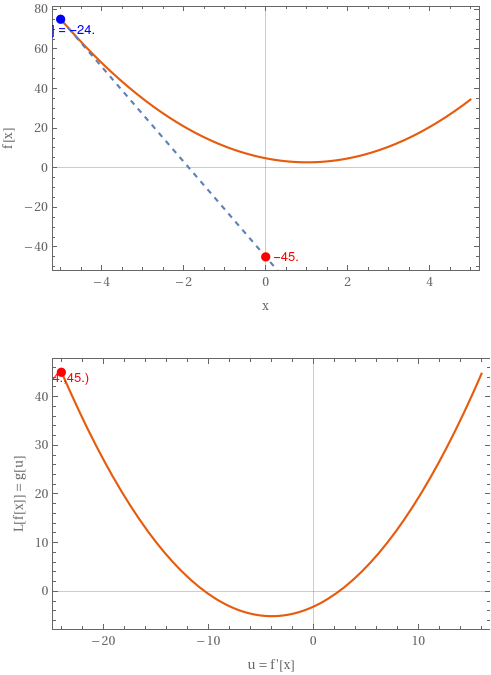

In [67]:
figs[[1]]